This analysis is for modelling the choice (binary) of given customers based on the features/attributes.  
The choice of purchase done or not depends on the probability of purchase which inturn depends upon the utility value . The log odds of purchase probability  is given by utility which is modelled as a linear combination of features . The model is evaluated for the goodness of fit. The probability for each customer is predicted. Different scenarios such as a change in the value of the attribute can be evaluated for its effect on the purchase probability and lift calculation can be done.     

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
import statsmodels.formula.api as smf

In [17]:
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("RFMdata.csv")

In [4]:
data.head()

,Id,Recency,Frequency,Monetary,Purchase
0,1,120,7.0,41.66,0
1,2,90,9.0,46.71,0
2,3,120,6.0,103.99,1
3,4,270,17.0,37.13,1
4,5,60,5.0,88.92,0


In [22]:
data['Purchase'].value_counts()

0    55
1    45
Name: Purchase, dtype: int64

In [6]:

m1 = smf.logit(
  formula='Purchase ~ Recency + Monetary + Frequency',
  data=data) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.152436
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:                  0.7785
Time:                        10:46:45   Log-Likelihood:                -15.244
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                 4.525e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.2977      8.553     -3.542      0.000     -47.061     -13.534
Recency        0.1114      0.031      3.596      0.000       0.051       0.172
Monetary       0.1677      0.047      3.601      0.000       0.076       0.259
Frequency      0.5941      0.243      2.445      0.014       0.118       1.070
==============================================================================

Possibly complete quasi-separation: A fraction 0.29 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Log odds of probability of purchase increases with unit increase in Recenccy , Monetary and Frequency.  

In [13]:
print("Coefficeients")
print(m1.params)
print()
print("p-Values")
print(m1.pvalues)
print()
print("Dependent variables")
print(m1.model.endog_names)

Coefficeients
Intercept   -30.297669
Recency       0.111418
Monetary      0.167705
Frequency     0.594127
dtype: float64

p-Values
Intercept    0.000396
Recency      0.000323
Monetary     0.000317
Frequency    0.014466
dtype: float64

Dependent variables
Purchase


In [15]:
data['prob1'] = m1.predict()

In [16]:
data.head()

,Id,Recency,Frequency,Monetary,Purchase,prob1
0,1,120,7.0,41.66,0,0.003073
1,2,90,9.0,46.71,0,0.000833
2,3,120,6.0,103.99,1,0.983323
3,4,270,17.0,37.13,1,1.000000
4,5,60,5.0,88.92,0,0.003238


In [19]:
probabilities = m1.predict()
data['pred_class'] = [1 if i > 0.5 else 0 for i in probabilities]

In [21]:
confusion_matrix(data['Purchase'], data['pred_class'])

array([[51,  4],
       [ 2, 43]])

In [29]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(data['Purchase'], data['prob1'])

In [30]:
roc_auc =  metrics.auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

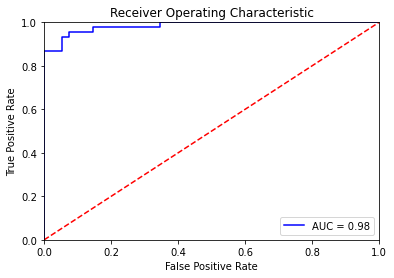

In [31]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [41]:
## What is the change in the probability of purchase if the monetary value increases by 1
data_new = data.copy()
data_new['Monetary'] = data_new['Monetary'] + 1
##
data_new['new_prob'] = m1.predict(data_new)

In [42]:
lift = (data_new['new_prob'].mean() - data_new['prob1'].mean())/ data_new['prob1'].mean()
print("% Lift in Purchase :{}".format(lift *100))

% Lift in Purchase :1.7522549465406088


In [43]:
data_new['new_prob'].mean()

0.45788514725943247

In [44]:
data_new['prob1'].mean()

0.44999999999999973

In [46]:
data_new['lift'] = (data_new['new_prob'] - data_new['prob1'])/data_new['prob1']

In [47]:
data_new.head()

,Id,Recency,Frequency,Monetary,Purchase,prob1,pred_class,new_prob,lift
0,1,120,7.0,42.66,0,0.003073,0,0.003632,1.819251e-01
1,2,90,9.0,47.71,0,0.000833,0,0.000985,1.824083e-01
2,3,120,6.0,104.99,1,0.983323,1,0.985861,2.581600e-03
3,4,270,17.0,38.13,1,1.000000,1,1.000000,1.553235e-08
4,5,60,5.0,89.92,0,0.003238,0,0.003827,1.818895e-01


In [48]:
data_new['lift'].mean()*100

9.898377528363515

There is an average percentage lift of 9%, with a unit increase in monetary value.   